In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv("Train_Dataset-01.csv")

In [38]:
df.isnull().sum()
df.isna().sum()
#missing values present

id                          0
diagnosis                   0
radius_mean                 0
texture_mean               12
perimeter_mean              0
area_mean                   0
smoothness_mean             1
compactness_mean            6
concavity_mean              0
concave points_mean         0
symmetry_mean               1
fractal_dimension_mean      2
radius_se                  14
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               3
compactness_se              2
concavity_se                1
concave points_se           1
symmetry_se                 1
fractal_dimension_se       13
radius_worst                0
texture_worst               0
perimeter_worst             1
area_worst                 13
smoothness_worst            3
compactness_worst           0
concavity_worst             6
concave points_worst        5
symmetry_worst              5
fractal_dimension_worst     3
dtype: int64

In [39]:
from sklearn.impute import SimpleImputer
df = df.replace('',np.NaN)

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df['diagnosis'] = labelencoder_Y.fit_transform(df['diagnosis'])

In [42]:
x_train=df[['area_mean','smoothness_mean']]
y_train=df['diagnosis']
#x_test=x_test[['area_mean','smoothness_mean']]
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(x_train)
x_train = imputer.transform(x_train)

In [43]:
x_test=pd.read_csv('Test_Dataset-01.csv')
x_test=x_test[['area_mean','smoothness_mean']]

In [44]:
#normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 4), random_state=42)
clf.fit(x_train, y_train)      

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


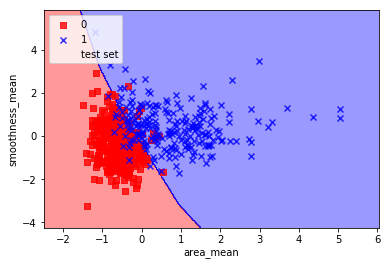

In [46]:
from matplotlib.colors import ListedColormap
y_pred=clf.predict(x_test)
X_combined=np.vstack((x_train,x_test))
y_combined=np.hstack((y_train,y_pred))
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

plot_decision_regions(X_combined, y_combined, classifier=clf, test_idx=range(148,209))

plt.xlabel('area_mean')
plt.ylabel('smoothness_mean')
plt.legend(loc='upper left')
plt.show()




In [47]:
clf.score(x_train,y_train)

0.9045092838196287

In [48]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0])